# Module 04: Advection Dominated Systems Assignment

## Overview and Requirements

___DISASTER!___ An earthquake has resulted in a partial meltdown of a nuclear reactor and the contamination of that reactor's cooling water tanks. The reactor automatically scrammed and the reactor hall was safe enough that the fuel rods were removed, but not before a significant leak of radioactive Cesium into the water stored in the tanks. Cs-137 is highly soluble in water and so the whole tank is effectively uniformly contaminated. What's worse, the earthquake also ruptured the cooling water tanks and contaminated water is now leaking into the aquifer. The location of the rupture is such that it is too dangerous to repair.

Your job as a consultant is to conduct a "worst case" scenario modeling study in which the tank will continue to drain contaminated water into the aquifer at a constant rate of 0.05% of its volume per year. The aquifer is an unconfined aquifer that has a saturated hydraulic conductivity ($K_s$) of 15.0 cm/day and a constant regional head gradient $\partial h/\partial t$ of 30.0 ft/mile.

Using your trusy advection-dominated code your wrote as a graduate student at Boise State, you know you can simply modify the boundary conditions to your model to examine the impact. Your solution notebook you turn in should have code that produces the following plots:

* The concentration of the contaminant of the aquifer at the contamination site
* Concentration profiles (concentration vs. distance) at every 50th time step of the simulation
* The plot showing the evolution of concentration as a function of both distance from the contamination site and time
* The breakthrough curve (concentration vs. time) at a location x = 1500 m

Answer the following questions:
* What time step did you have to select to get the Courant number as close to 1.0 as possible?
* If you were to have to describe what was going to happen to the water quality at the town located 1.5 km from the contamination site, how would you describe in words how the water quality will behave in the future?
* If concentrations below 0.05 GBq/g are considered safe for drinking water quallity, at the town 1.5 km away from the contamination site, how many years in the future will it take the contamination plume to arrive? And how long will the water be unusable?


In [283]:
import numpy as np
import matplotlib.pyplot as plt

dx = 5.0  # Spatial interval [m] - DON'T CHANGE
dt = 16.04  # Time step [yr]

# Fraction of initial tank volume lost each year [yr-1]
k_tank = 0.0005

xmin = 0.0 # Origin: Contamination site
xmax = 4000.0 # Edge of the domain

t0 = 0.0 # Time that the tank broke
tf = 10000.0 # End of simulation time

Ks = 15.0 # Saturated hydraylic conductivity [cm/day]
dhdx = 30.0 # Regional piezometric gradient [ft/mi]

Ks = Ks/100.0*365.25 # Converting Ks from [cm/day] to [m/yr]
dhdx = dhdx*(1/5280.0)  # Convert to ft/ft

In [284]:
q = Ks*dhdx

print('The Darcy velocity is ' + '{:.3f}'.format(q) + ' [m/yr]')

The Darcy velocity is 0.311 [m/yr]


In [285]:
x = np.arange(xmin+dx/2, xmax, dx)
Nx = x.size

print('The number of cells is: Nx = ' + str(Nx))

The number of cells is: Nx = 800


In [286]:
t = np.arange(t0,tf+dt,dt)
t = t[:-1]
Nt = t.size
print('The number of time steps: Nt = ' + str(Nt))

The number of time steps: Nt = 624


In [287]:
Courant = q*(dt/dx)

print('The Courant number is ' + '{:.3f}'.format(Courant)+'. The optimal number is 1 to avoid numerical diffusion. Consider changing dt')

The Courant number is 0.999. The optimal number is 1 to avoid numerical diffusion. Consider changing dt


### Setup Initial and Boundary Conditions

In [288]:
#print(t)
#print(x)

In [289]:
'''
c0 = np.zeros((Nx,1))
c0[0] = 1
print(Nx)
'''

'\nc0 = np.zeros((Nx,1))\nc0[0] = 1\nprint(Nx)\n'

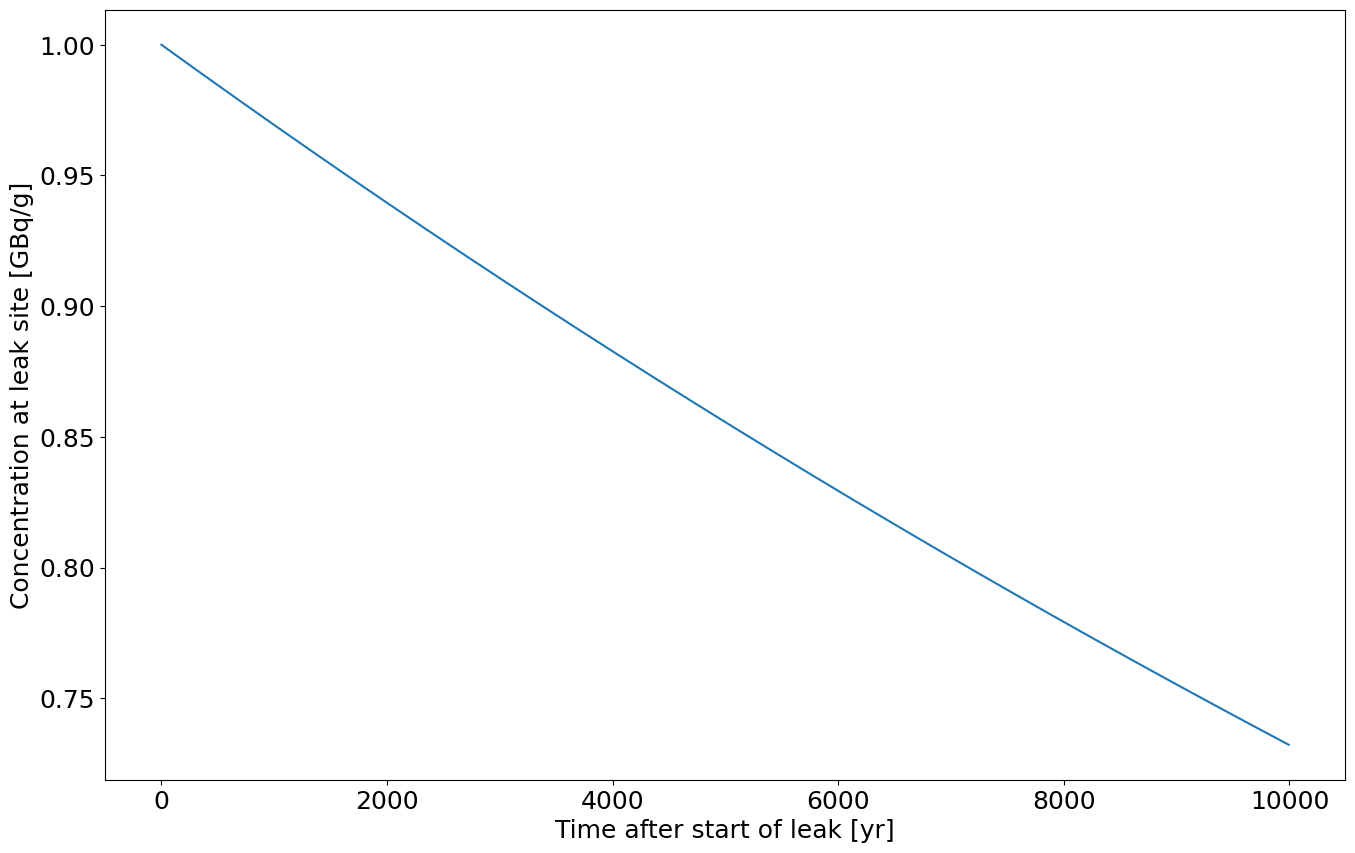

In [290]:
# The concentration of the contaminant of the aquifer at the contamination site

# Initial condition: concentration is 0 GBq/g everywhere except at x = 0,
# where it is 1 Bq/g
c0 = np.zeros((Nx,1))
# SHOULD THIS BE Nx OR Nt ???

csource = np.zeros((Nt,1))

c0[0] = 1

# Boundary condition: concentration decreases at a rate of k_tank [yr-1]

'''
for i in range(len(c0)):
  if i == 0:
    c0[i] = c0[0]
  else:
    c0[i] = (1 - k_tank) * c0[i-1]
'''

'''
for i in range(len(c0)):
  c0[i] = 1
'''

# test
for i in range(len(csource)):
  if i == 0:
    csource[i] = 1
  else:
    csource[i] = (1 - k_tank) * csource[i-1]

plt.figure(figsize=(16,10))
plt.rcParams.update({'font.size': 18})
#plt.plot(csource)
plt.plot(t,csource)
plt.xlabel('Time after start of leak [yr]')
plt.ylabel('Concentration at leak site [GBq/g]')
plt.show()

### Preallocate Container for Solution

In [291]:
C = np.zeros((Nx,Nt))
print(C)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [292]:
print(c0)

[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

### Compute Solution

In [293]:
for i in np.arange(Nt):

    # Get initial conditions
    if (i==0):
        Cprev = c0
    else:
        Cprev = C[:,i-1]

    Cnext = np.zeros((Nx))

    for j in np.arange(Nx):

        if (j==0):
          # SET ARRAY = CONC @ START DISTANCE
          Cnext[0] = csource[i] # SHOULD THIS BE j OR i?  ???
          # ORIGINALLY, I HAD THIS AS j
          # ON THE SECOND TRY, I CHANGED IT TO i
          # WOW, THAT MADE ALL THE DIFFERENCE !!!

        else:
          # PUT ADVECTION 1-D EQN FOR CNEXT
          Cnext[j] = Cprev[j] + q*(dt/dx)*(Cprev[j-1] - Cprev[j])



    C[:,i] = Cnext

<ipython-input-293-d55cd58ab8b4>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Cnext[0] = csource[i] # SHOULD THIS BE j OR i?  ???
<ipython-input-293-d55cd58ab8b4>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Cnext[j] = Cprev[j] + q*(dt/dx)*(Cprev[j-1] - Cprev[j])


### Plot solutions

In [294]:
print(Nt)
print(Nx)

624
800


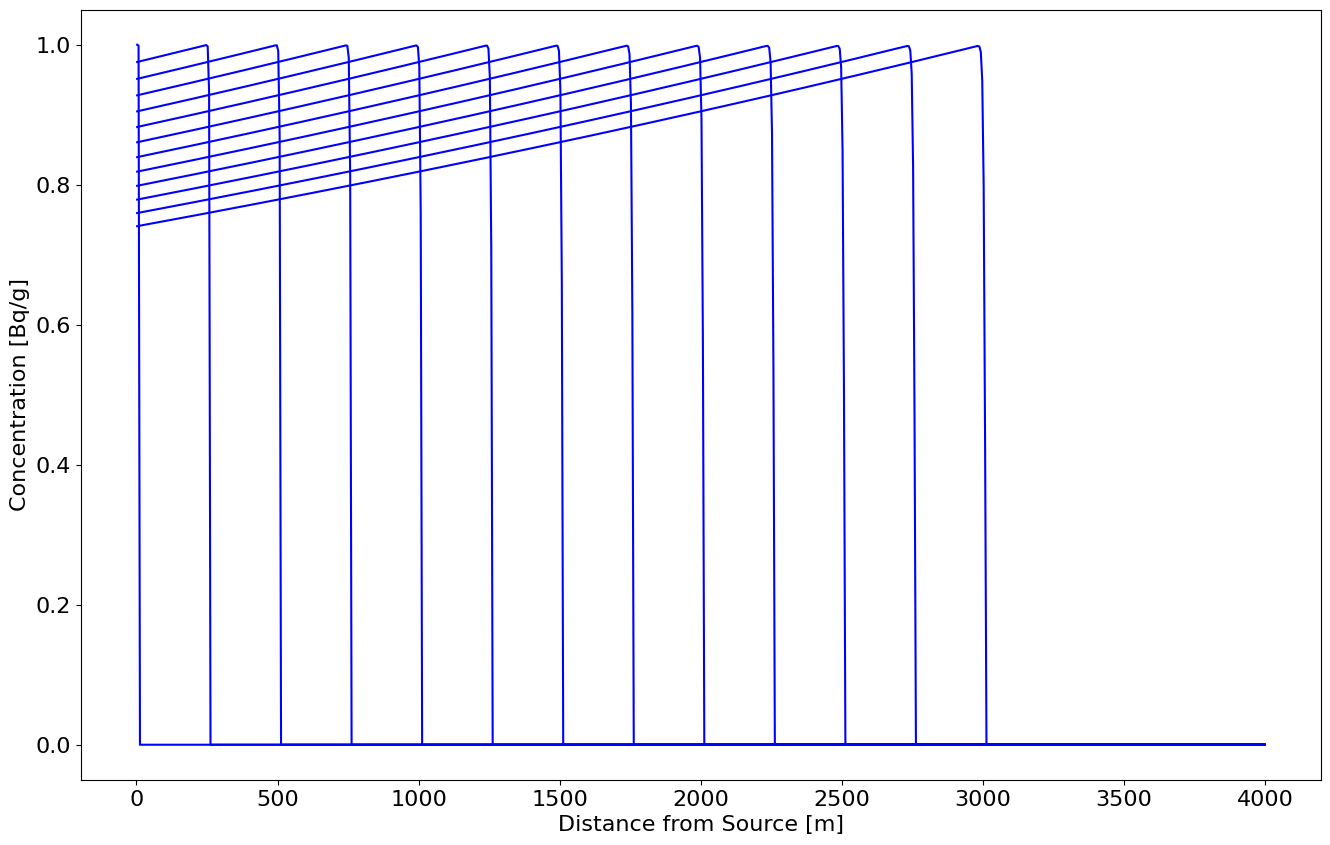

In [295]:
# Concentration profiles (concentration vs. distance) at every 50th time step of the simulation

## First off, let's change the font size for all of our plots to be more legible
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(16,10))

# Plot every 50th concentration curve
for p in np.arange(0,Nt,50):
    plt.plot(x,C[:,p],'b')

plt.ylabel('Concentration [Bq/g]')
plt.xlabel('Distance from Source [m]')
plt.show()

Text(0, 0.5, 'Time [years]')

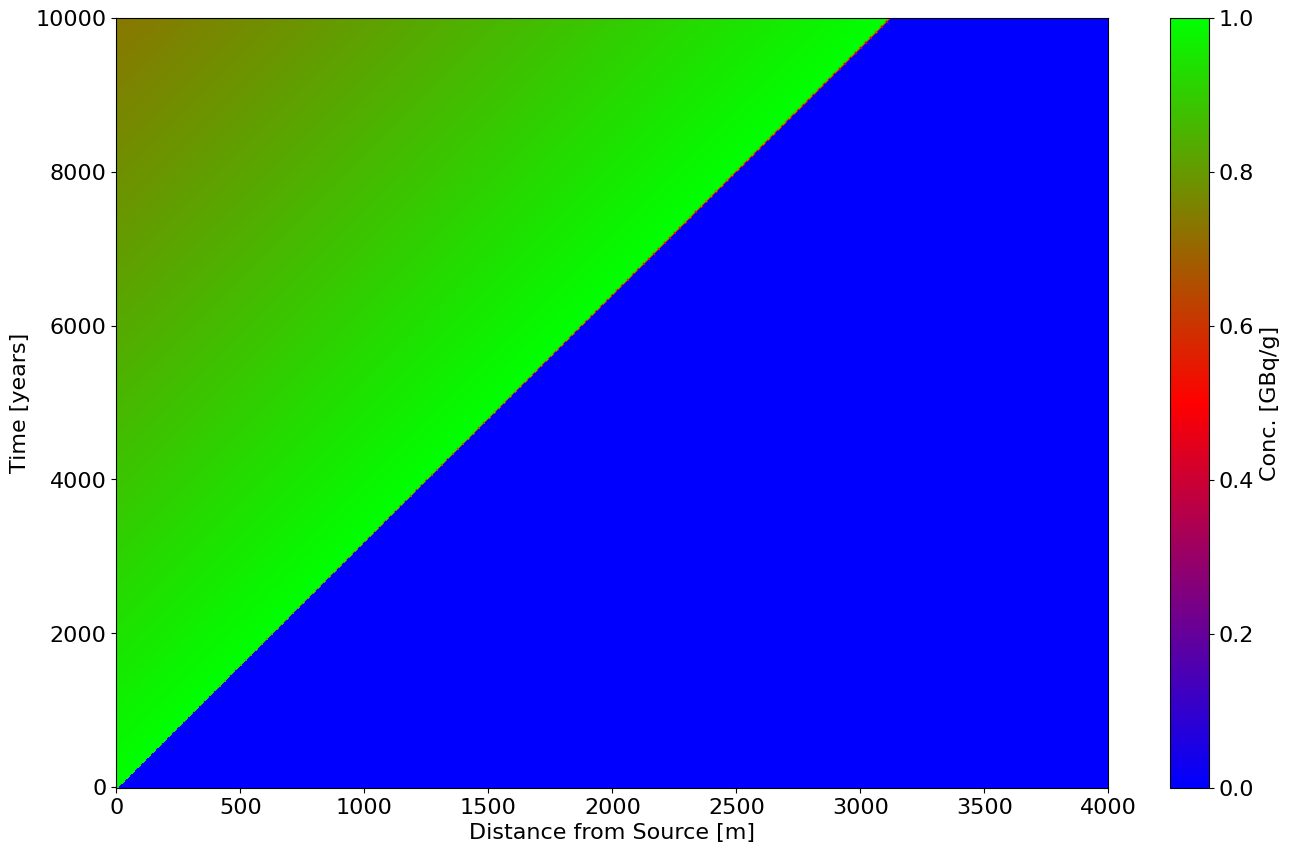

In [296]:
# The plot showing the evolution of concentration as a function of both distance from the contamination site and time

xx,tt = np.meshgrid(t,x)

plt.figure(figsize=(16,10))

plt.pcolormesh(tt,xx,C,cmap='brg')

plt.colorbar(label='Conc. [GBq/g]')
plt.xlabel('Distance from Source [m]')
plt.ylabel('Time [years]')


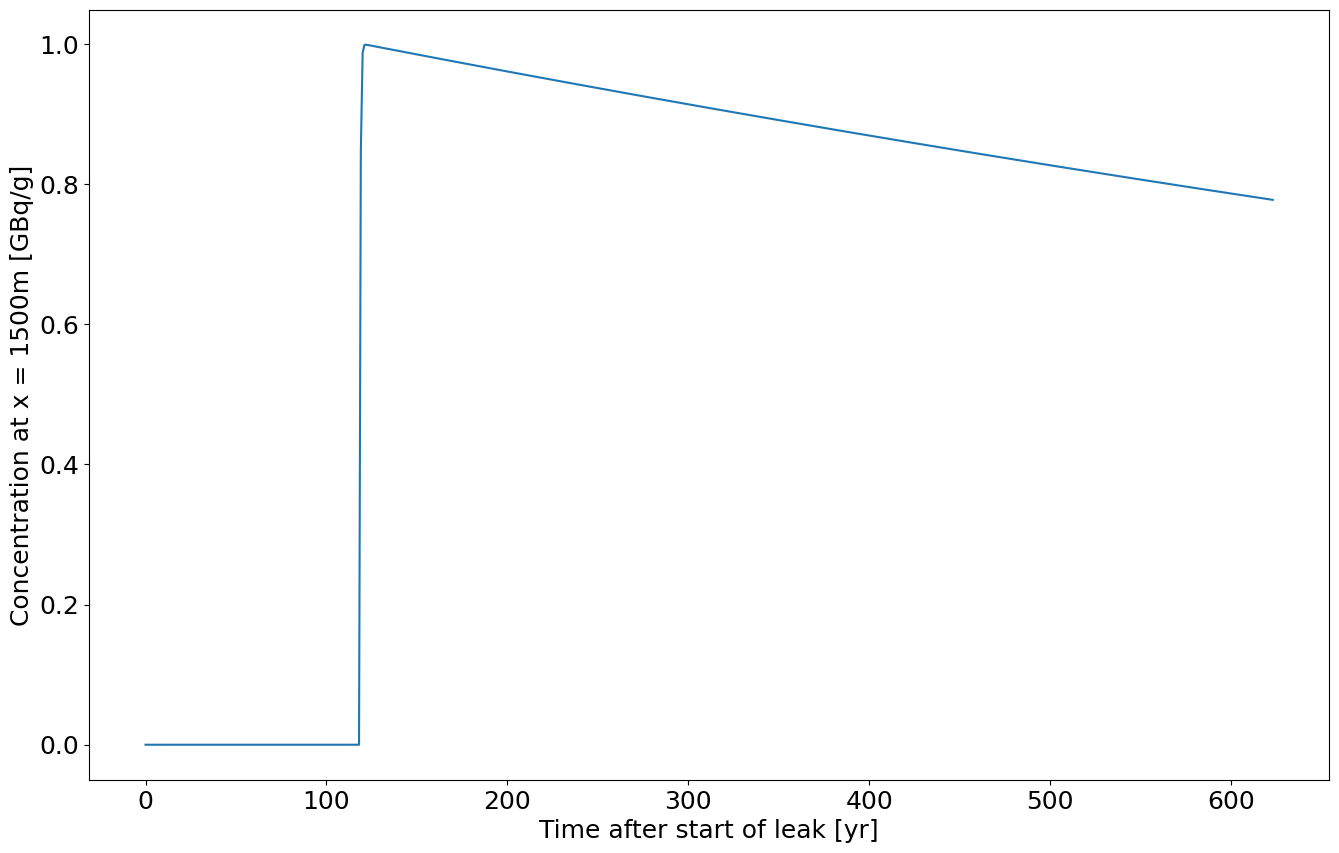

In [297]:
# The breakthrough curve (concentration vs. time) at a location x = 1500 m

plt.figure(figsize=(16,10))
plt.rcParams.update({'font.size': 18})
plt.plot(C[120,:])
plt.xlabel('Time after start of leak [yr]')
plt.ylabel('Concentration at x = 1500m [GBq/g]')
plt.show()

In [298]:
# TEST STATEMENT
print(C)

[[1.         0.9995     0.99900025 ... 0.7330234  0.73265689 0.73229056]
 [0.9986267  0.99999811 0.99950068 ... 0.7333906  0.73302391 0.73265739]
 [0.         0.9972553  0.99999435 ... 0.73375799 0.73339111 0.73302441]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [300]:
'''
QUESTIONS :

1. What time step did you have to select to get the Courant number as close to 1.0 as possible?

2. If you were to have to describe what was going to happen to the water quality at the town located 1.5 km from the contamination
site, how would you describe in words how the water quality will behave in the future?

3. If concentrations below 0.05 GBq/g are considered safe for drinking water quallity, at the town 1.5 km away from the contamination
site, how many years in the future will it take the contamination plume to arrive? And how long will the water be unusable?
'''



'''
QUESTION 1 RESPONSE :

I ultimately selescted a time strp (dt) = 16.04 years to get a Courant number equal to 0.999, which was the closest to 1 that
I could get the Courant number without surpassing q = 1. When I tried dt values that drove the Courant number past q = 1, the
plots for concentration over distance and time changed to a totally differnt pattern that did not look like 1-D advection. Thus,
the Courant values yielding results that seemed most reasonable were values close to 1, but never exceeding q = 1.
'''

'''
QUESTION 2 RESPONSE :

Based on the breakthrough curve generated for x = 1500 m above, I would report that the concentration will remain at safe levels for a
little over 100 years; once the plume reached 1500 m, the concentration rises rapedliy = c = ~1, and proceeds to decrease at a very
gradudal rate in the centuries that follow.
'''

'''
QUESTION 3 RESPONSE :
It will take approximately 115 yrs. for the plume to arrive at the town's location. Upon arrival, the concentration increases so rapidly that
the water will be un-drinkable as soon as a year after the arrival of the plume. The water is modeled to remain un-drinkable for many
centuries to follow, thus probably forcing the re-location of this unfortunate town.
'''



'\nQUESTION 3 RESPONSE :\n'